In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! unzip "/content/drive/Shareddrives/UwU w what's dis /shortage_BeeDataset.zip" -d ./SavedModel
! ls ./SavedModel

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: ./SavedModel/original_BeeDataset_20201121/None/92gzxNwm0Oevz5mGJtHjqKlWfaPlQinS.jpeg  
  inflating: ./SavedModel/original_BeeDataset_20201121/None/968uYuQZ3A8kzDwZq79A0BXLZZLmy01r.jpeg  
  inflating: ./SavedModel/original_BeeDataset_20201121/None/96IZRC3UmcnNZYkkDZJLJhVqgHXa5C7r.jpeg  
  inflating: ./SavedModel/original_BeeDataset_20201121/None/98et49pu44CLvTLxaezPANpOWy7KOSis.jpeg  
  inflating: ./SavedModel/original_BeeDataset_20201121/None/98Kd0zV9K06hFWqLJOvUvosEwUkUMwO9.jpeg  
  inflating: ./SavedModel/original_BeeDataset_20201121/None/99237Pvgd7ru9ACA9NpYe0CFZsmwhnov.jpeg  
  inflating: ./SavedModel/original_BeeDataset_20201121/None/99MSZgcRz9vpAJ1GVKVx6mphvw6tPid0.jpeg  
  inflating: ./SavedModel/original_BeeDataset_20201121/None/9BJaLxK7OqFgzxKgg3PNIsXC58PFe6mu.jpeg  
  inflating: ./SavedModel/original_BeeDataset_20201121/None/9cl8o1k1VVjuIOBPUZlzNJ9iPDu0hpQl.jpeg  
  inflating: ./SavedModel/original_BeeDatas

In [ ]:
! mkdir /content/SavedModel/test
! mkdir /content/SavedModel/training
! cp -r /content/SavedModel/original_BeeDataset_20201121/* \
     /content/SavedModel/training
! path=''

In [ ]:
# get da firsrt item in each folder in the data set and move it to the test folder
! for f in /content/SavedModel/training/*;\
   do \
    files=($f/*);\
    echo "Moving $files to testing folder";\
    mv "${files[0]}" /content/SavedModel/test/;\
   done;
! for f in /content/SavedModel/training/*;\
   do \
    files=($f/*);\
    echo "Moving $files to testing folder";\
    mv "${files[0]}" /content/SavedModel/test/;\
   done;
! for f in /content/SavedModel/training/*;\
   do \
    files=($f/*);\
    echo "Moving $files to testing folder";\
    mv "${files[0]}" /content/SavedModel/test/;\
   done;


Moving /content/SavedModel/training/None/0ejBuxJVHHWgPy3QsAMeYdvSOi6ygA5E.jpeg to testing folder
Moving /content/SavedModel/training/Varroa/0EPjqFy8bWC2IWa9Y9kGaHcxii4py244.jpeg to testing folder
Moving /content/SavedModel/training/Wasps/0XdGwwdjcbaDa4GbnOyldtQ8dPtaIKiq.jpeg to testing folder
Moving /content/SavedModel/training/None/0fCay9K3iGILR1Kkr4Q0uXLF3JDJOKHv.jpeg to testing folder
Moving /content/SavedModel/training/Varroa/0fVqoqYSTgogBasB4q3uIzGzbdNkNkzC.jpeg to testing folder
Moving /content/SavedModel/training/Wasps/0YXRPVEhuaZnfhzfhIGC34ARrtyP1Upp.jpeg to testing folder
Moving /content/SavedModel/training/None/0g5ub8jDcH5QbwW7HVk7Yn3jUo3v4xjg.jpeg to testing folder
Moving /content/SavedModel/training/Varroa/0gcjfrfoaRJcQX2kL8jhhyNFQXUyH6qV.jpeg to testing folder
Moving /content/SavedModel/training/Wasps/10vk5gfOX0A3NVShsXnCQYt12jRRXp1m.jpeg to testing folder


In [ ]:
# dataset_path = "/content/SavedModel/original BeeDataset_20201121"
dataset_path = "/content/SavedModel/training"
model_export_path = "/content/drive/Shareddrives/UwU w what's dis "
# labels_file = #example: C:\Users\Chuon\OneDrive\Tài liệu\GitHub\aiot-beehive\test\data.json
# export_path =

In [ ]:
# Import libraries
import os
import cv2
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from dotenv import load_dotenv
# load_dotenv()

In [ ]:
# Set directories
root_dir = os.getcwd()
# data_dir = os.path.join(os.getenv('dataset_path'))
data_dir = dataset_path
# test_dir = os.path.join(root_dir, 'test-dataset')
test_dir = "/content/SavedModel/test"

In [ ]:
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

In [ ]:
IMG_SIZE = (150, 300)
IMG_SHAPE = IMG_SIZE + (3,)

In [ ]:
# Load data
# Load data for training
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=42,
    validation_split=0.2,  # 20% of the data for validation
    subset='both',
    batch_size=32,
    image_size=IMG_SIZE,
)

# Load data for testing (using the remaining data)
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=42,
    validation_split=0.2,  # The remaining 20% for testing
    subset='validation',
    batch_size=32,
    image_size=IMG_SIZE,
)

Found 5465 files belonging to 3 classes.
Using 4372 files for training.
Using 1093 files for validation.
Found 5465 files belonging to 3 classes.
Using 1093 files for validation.


In [ ]:
class_names = train_ds.class_names
class_num = len(class_names)

In [ ]:
# Data augmentation
data_augment = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal_and_vertical'),
                                    tf.keras.layers.RandomRotation(0.2),
                                    ])

In [ ]:
# Image normalization
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet',
                                               )

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 300, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 150, 32)          864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 150, 32)          128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 75, 150, 32)          0         ['bn_Conv1[

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(class_num, activation='softmax')

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
# x = data_augment(inputs)
x = inputs
# x = preprocess_input(x)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 300, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 150, 300, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 150, 300, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 5, 10, 1280)       2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
base_learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'],
              )

In [ ]:
initial_epochs = 10

In [ ]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds,
                    )

Epoch 1/10
137/137 [==============================] - 183s 1s/step - loss: 1.1470 - accuracy: 0.5039 - val_loss: 0.8106 - val_accuracy: 0.6359
Epoch 2/10
137/137 [==============================] - 192s 1s/step - loss: 0.8052 - accuracy: 0.6439 - val_loss: 0.6540 - val_accuracy: 0.7274
Epoch 3/10
137/137 [==============================] - 194s 1s/step - loss: 0.6894 - accuracy: 0.6962 - val_loss: 0.5751 - val_accuracy: 0.7548
Epoch 4/10
137/137 [==============================] - 188s 1s/step - loss: 0.6197 - accuracy: 0.7264 - val_loss: 0.5277 - val_accuracy: 0.7658
Epoch 5/10
137/137 [==============================] - 182s 1s/step - loss: 0.5636 - accuracy: 0.7431 - val_loss: 0.4958 - val_accuracy: 0.7777
Epoch 6/10
137/137 [==============================] - 181s 1s/step - loss: 0.5308 - accuracy: 0.7635 - val_loss: 0.4698 - val_accuracy: 0.7896
Epoch 7/10
137/137 [==============================] - 178s 1s/step - loss: 0.5162 - accuracy: 0.7704 - val_loss: 0.4486 - val_accuracy: 0.8033

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

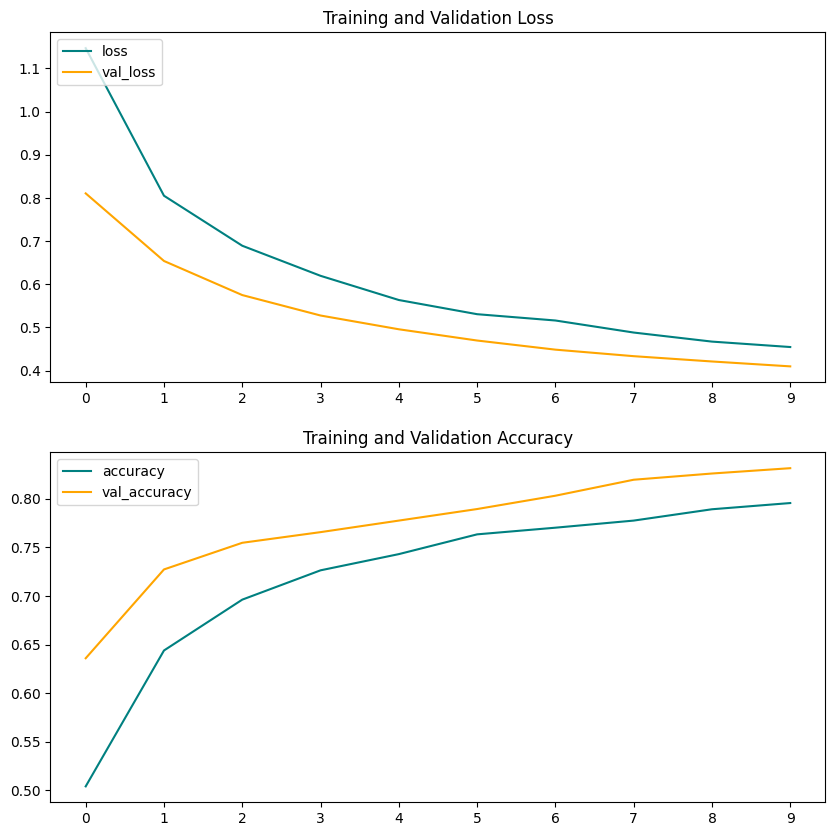

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(loss, color='teal', label='loss')
plt.plot(val_loss, color='orange', label='val_loss')
plt.xticks(range(history.epoch[-1] + 1))
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(acc, color='teal', label='accuracy')
plt.plot(val_acc, color='orange', label='val_accuracy')
plt.xticks(range(history.epoch[-1] + 1))
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
base_model.trainable = True
fine_tune_layers = 120

In [ ]:
for layer in base_model.layers[:fine_tune_layers]:
    layer.trainable = False

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(
                  learning_rate=base_learning_rate/10),
              metrics=['accuracy'],
              )

In [ ]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1]+1,
                         validation_data=val_ds,
                         )

Epoch 11/20
137/137 [==============================] - 242s 2s/step - loss: 0.3973 - accuracy: 0.8253 - val_loss: 0.3050 - val_accuracy: 0.8783
Epoch 12/20
137/137 [==============================] - 234s 2s/step - loss: 0.2777 - accuracy: 0.8916 - val_loss: 0.2466 - val_accuracy: 0.9030
Epoch 13/20
137/137 [==============================] - 234s 2s/step - loss: 0.2191 - accuracy: 0.9177 - val_loss: 0.2079 - val_accuracy: 0.9186
Epoch 14/20
137/137 [==============================] - 234s 2s/step - loss: 0.1625 - accuracy: 0.9396 - val_loss: 0.2022 - val_accuracy: 0.9195
Epoch 15/20
137/137 [==============================] - 233s 2s/step - loss: 0.1388 - accuracy: 0.9527 - val_loss: 0.1731 - val_accuracy: 0.9350
Epoch 16/20
137/137 [==============================] - 228s 2s/step - loss: 0.1170 - accuracy: 0.9588 - val_loss: 0.1553 - val_accuracy: 0.9442
Epoch 17/20
137/137 [==============================] - 237s 2s/step - loss: 0.1015 - accuracy: 0.9671 - val_loss: 0.1534 - val_accuracy:

In [ ]:
loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

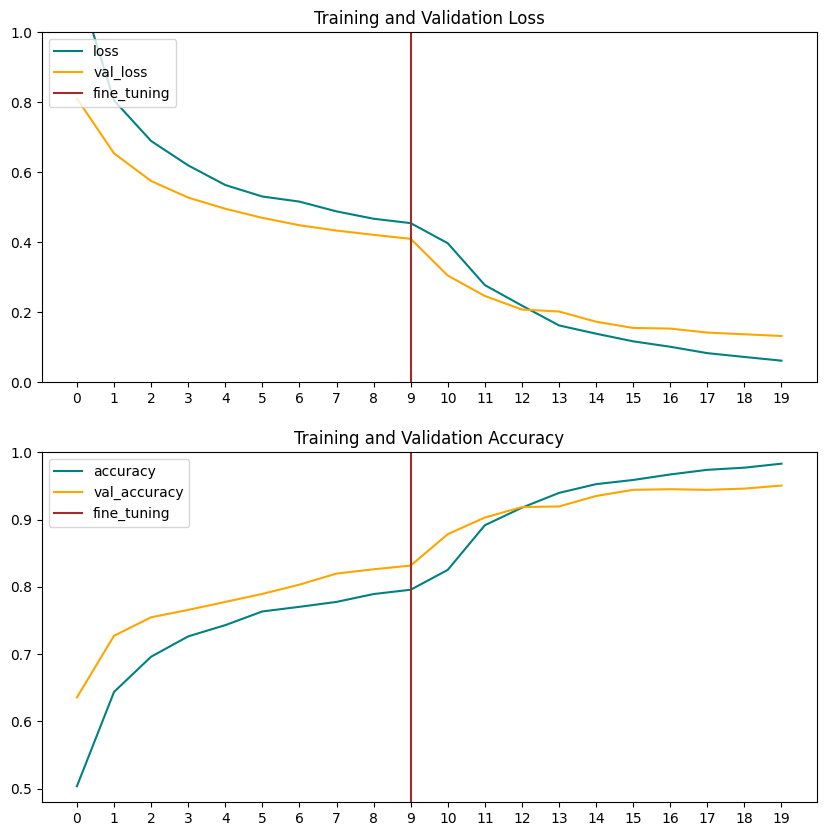

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(loss, color='teal', label='loss')
plt.plot(val_loss, color='orange', label='val_loss')
plt.xticks(range(history_fine.epoch[-1]+1))
plt.ylim([0, 1])
plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), color='brown', label='fine_tuning')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(acc, color='teal', label='accuracy')
plt.plot(val_acc, color='orange', label='val_accuracy')
plt.xticks(range(history_fine.epoch[-1]+1))
plt.ylim([min(plt.ylim()), 1])
plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), color='brown', label='fine_tuning')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.show()

1/1 [==============================] - 0s 42ms/step


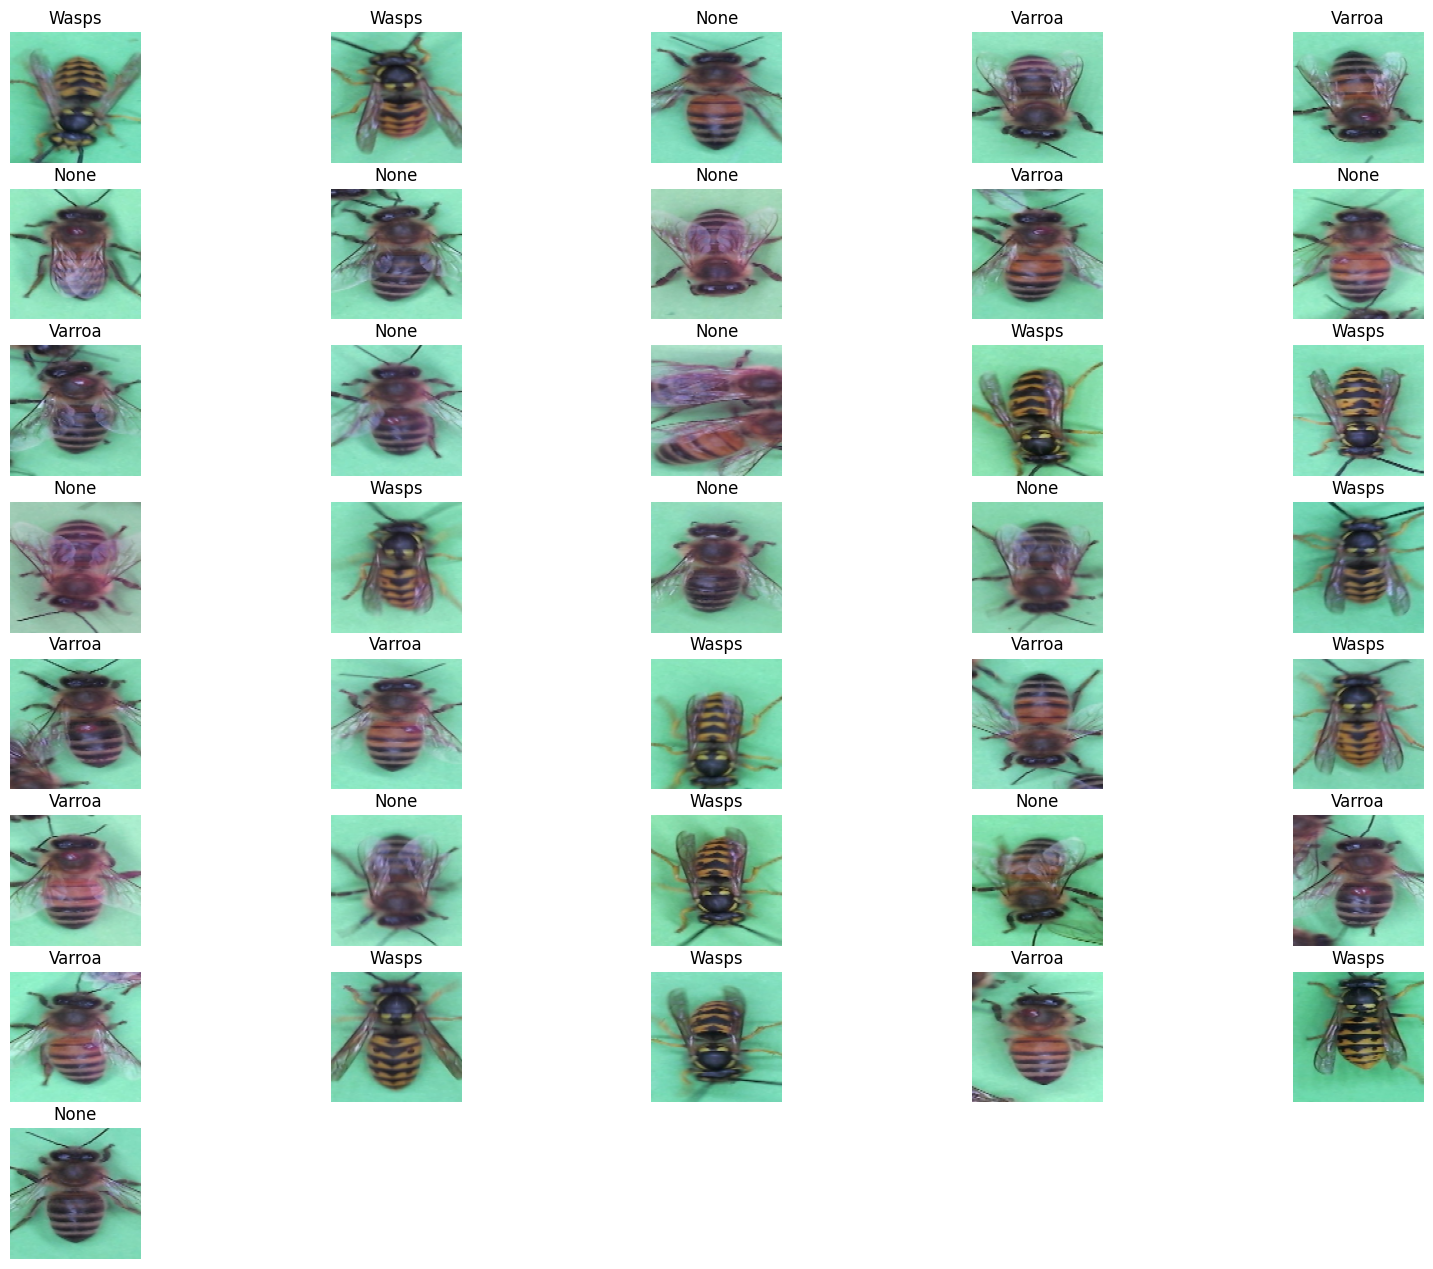

In [ ]:
plt.figure(figsize=(20, 20))

for index, image in enumerate(os.listdir(test_dir)):
    img = cv2.imread(os.path.join(test_dir, image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = tf.image.resize(img, IMG_SIZE)

    yhat = model.predict(np.expand_dims(img, 0))
    yhat = tf.nn.softmax(yhat[0])
    yhat = np.array(yhat)

    plt.subplot(10, 5, index + 1)
    plt.imshow(img.numpy().astype('uint8'))
    plt.title(class_names[np.argmax(yhat)])
    plt.axis('off')

    # Set the size of the displayed image
    plt.gcf().get_axes()[index].set_aspect(3)  # Adjust the value (3) as needed

plt.show()

In [ ]:
# path
# model.save(os.path.join(root_dir, 'models',
#            'seeded_model.keras'))
# Save model on the shared drive, separated by time

from datetime import datetime
# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%Y-%m-%d-%H-%M")

model.save(os.path.join(model_export_path, 'models',
           'seeded_model.keras',dt_string))